<a href="https://colab.research.google.com/github/TharunKumar-12/SIH_RAILYIN_OLIGAL/blob/main/SIH_RAIYLIN_OLIGAL_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy of crack detection: 100.00%


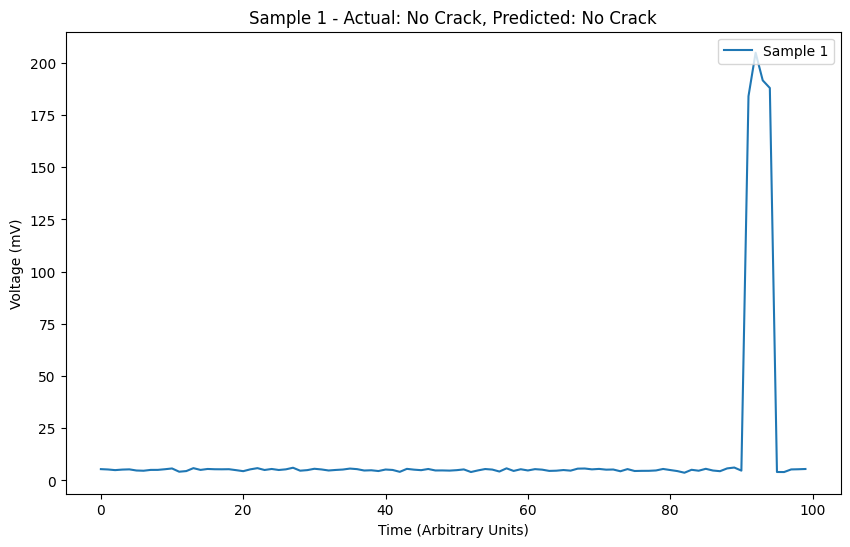

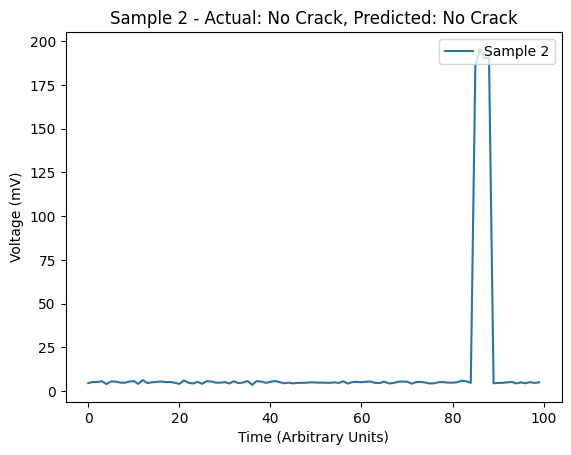

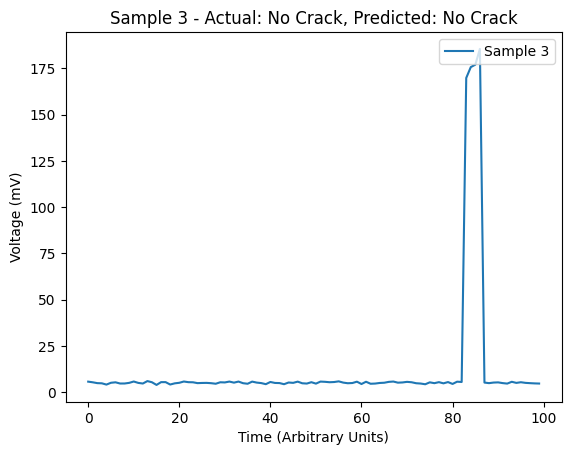

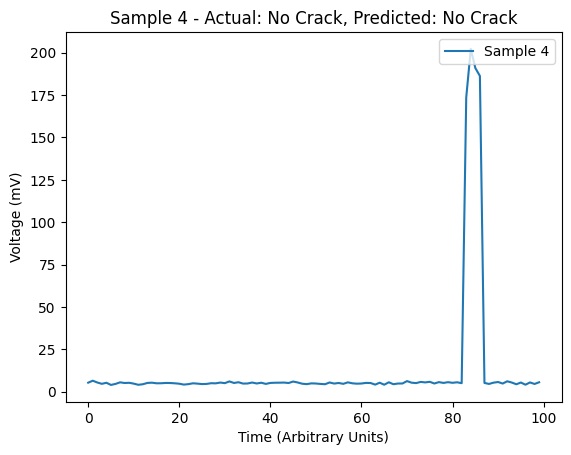

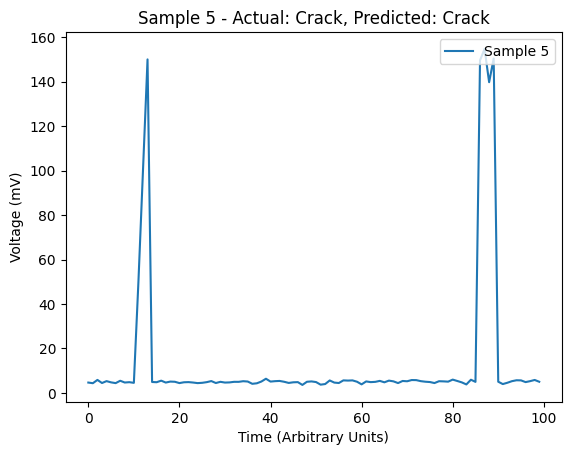

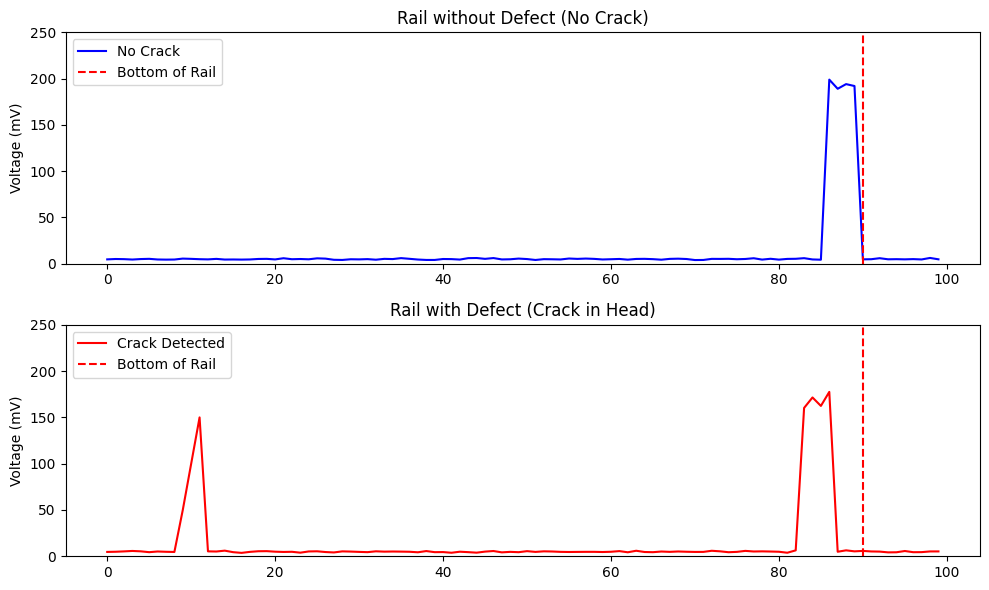

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Simulate rail signal from EMAT transducer
def generate_rail_signal(length, crack=False):
    """
    Simulate voltage readings for rail without and with cracks.
    :param length: Length of the signal (number of time steps).
    :param crack: Boolean indicating whether to simulate a crack or not.
    :return: Simulated voltage readings.
    """
    # Simulate baseline noise in millivolts (representing microvolt fluctuations)
    signal = np.random.normal(5, 0.5, length)  # Baseline noise in millivolts

    # Randomize the spike magnitude and add it towards the end to represent the bottom of the rail
    end_point = np.random.randint(length - 15, length - 5)  # Randomize where near the end the spike appears
    spike_height = np.random.uniform(150, 200)  # Randomize the height of the spike
    # Adjust the spike to be narrower and more vibrated
    signal[end_point - 2:end_point + 2] = spike_height + np.random.normal(0, 10, 4)  # Randomized and narrower spike

    if crack:
        # Add a spike early in the signal to simulate a crack in the head of the rail
        crack_start = np.random.randint(5, 20)  # Random position near the start
        signal[crack_start:crack_start + 3] = np.linspace(50, 150, 3)  # Crack spike

    return signal

# Simulate voltage data (with or without cracks)
def generate_voltage_data(samples, length):
    """
    Generate a dataset of rail signals with and without cracks.
    :param samples: Number of samples to generate.
    :param length: Length of each signal (time steps).
    :return: Voltage signals and their corresponding labels.
    """
    crack_data = np.array([generate_rail_signal(length, crack=True) for _ in range(samples // 2)])
    no_crack_data = np.array([generate_rail_signal(length, crack=False) for _ in range(samples // 2)])

    # Labels: 1 for crack, 0 for no crack
    labels = np.hstack((np.ones(samples // 2), np.zeros(samples // 2)))

    # Combine data
    X = np.vstack((crack_data, no_crack_data))

    return X, labels

# Parameters
samples = 1000
sequence_length = 100  # Example sequence length (number of time steps)

# Generate cracked and non-cracked data
X, y = generate_voltage_data(samples, sequence_length)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Test the model
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of crack detection: {accuracy * 100:.2f}%")

# Plotting test data with actual and predicted labels
def plot_test_voltage_data(X_test, y_test, y_pred, num_samples=5, sequence_length=100):
    """
    Plots the test voltage data with the model's predictions.
    :param X_test: The test data.
    :param y_test: The actual labels.
    :param y_pred: The predicted labels by the model.
    :param num_samples: Number of test samples to visualize.
    :param sequence_length: Length of the sequence (x-axis).
    """
    time = np.arange(sequence_length)  # X-axis for time

    plt.figure(figsize=(10, 6))

    for i in range(num_samples):
        plt.plot(time, X_test[i], label=f'Sample {i+1}')
        actual_label = 'Crack' if y_test[i] == 1 else 'No Crack'
        predicted_label = 'Crack' if y_pred[i] == 1 else 'No Crack'

        plt.title(f'Sample {i+1} - Actual: {actual_label}, Predicted: {predicted_label}')
        plt.xlabel('Time (Arbitrary Units)')
        plt.ylabel('Voltage (mV)')
        plt.legend(loc='upper right')
        plt.show()

# Plot test results for 5 samples
plot_test_voltage_data(X_test, y_test, y_pred, num_samples=5, sequence_length=sequence_length)

# Visualizing specific signals (similar to your provided graphs)
def plot_example_signals():
    """
    Plots one example of a signal without a crack and one with a crack (as shown in the reference images).
    """
    # Generate no-crack and crack signals
    no_crack_signal = generate_rail_signal(sequence_length, crack=False)
    crack_signal = generate_rail_signal(sequence_length, crack=True)

    # Plotting the signals
    plt.figure(figsize=(10, 6))

    # Plot No Crack (Baseline)
    plt.subplot(2, 1, 1)
    plt.plot(no_crack_signal, label='No Crack', color='blue')
    plt.title('Rail without Defect (No Crack)')
    plt.ylabel('Voltage (mV)')
    plt.ylim([0, 250])
    plt.axvline(x=sequence_length-10, color='r', linestyle='--', label='Bottom of Rail')
    plt.legend()

    # Plot Crack
    plt.subplot(2, 1, 2)
    plt.plot(crack_signal, label='Crack Detected', color='red')
    plt.title('Rail with Defect (Crack in Head)')
    plt.ylabel('Voltage (mV)')
    plt.ylim([0, 250])
    plt.axvline(x=sequence_length-10, color='r', linestyle='--', label='Bottom of Rail')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot example signals (no crack and crack)
plot_example_signals()
